# Simple CNN Model with 20% Validation Dataset and Early Stopping
# No Dropout Batch Normalization, 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_X = pd.read_csv('train.csv')
test_X = pd.read_csv('test.csv' )
train_X.drop(train_X.columns[train_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_X.drop(test_X.columns[test_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

train_result = pd.read_csv('train_result.csv')
train_y_class = train_result['Class']

X_train = train_X.to_numpy()
X_test = test_X.to_numpy()
train_y = train_y_class.to_numpy()

print(train_y.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(50000, 1568)
(10000, 1568)


In [3]:
X_train, X_val, train_y, val_y = train_test_split(X_train, train_y,  test_size=0.20, random_state=101)

In [4]:
print(X_train.shape)
print(X_val.shape)
print(train_y.shape)
print(val_y.shape)

(40000, 1568)
(10000, 1568)
(40000,)
(10000,)


In [5]:
from tensorflow.keras.utils import to_categorical
c = len(np.unique(train_y))
y_train = to_categorical(train_y,c)
y_val = to_categorical(val_y,c)

In [6]:
#y_train
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X_train = X_train.reshape(40000, 28, 56, 1)
X_val = X_val.reshape(10000, 28, 56, 1)
X_test = X_test.reshape(10000, 28, 56, 1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 28, 56, 1)
(10000, 28, 56, 1)
(10000, 28, 56, 1)


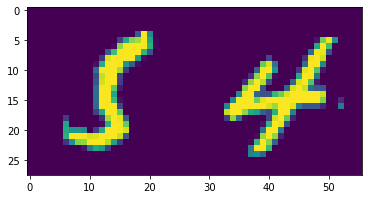

In [8]:
single_image = X_train[0]
plt.imshow(single_image)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [10]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(19, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 54, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 12, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 10, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 5, 128)        0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40000, 28, 56, 1)
(10000, 28, 56, 1)
(40000, 19)
(10000, 19)


In [15]:
epochs=100
model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val, y_val),callbacks=[early_stop])

Epoch 1/100
1250/1250 [==============================] - 47s 37ms/step - loss: 1.3016 - accuracy: 0.5630 - val_loss: 0.3429 - val_accuracy: 0.9054
Epoch 2/100
1250/1250 [==============================] - 47s 38ms/step - loss: 0.2442 - accuracy: 0.9328 - val_loss: 0.1791 - val_accuracy: 0.9505
Epoch 3/100
1250/1250 [==============================] - 43s 34ms/step - loss: 0.1384 - accuracy: 0.9592 - val_loss: 0.1520 - val_accuracy: 0.9579
Epoch 4/100
1250/1250 [==============================] - 43s 34ms/step - loss: 0.0871 - accuracy: 0.9742 - val_loss: 0.1302 - val_accuracy: 0.9643
Epoch 5/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.1193 - val_accuracy: 0.9675
Epoch 6/100
1250/1250 [==============================] - 37s 29ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.1289 - val_accuracy: 0.9657
Epoch 7/100
1250/1250 [==============================] - 38s 30ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
losses = pd.DataFrame(model.history.history)

In [18]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.301558,0.563000,0.342864,0.9054
1,0.244160,0.932825,0.179137,0.9505
2,0.138400,0.959200,0.152048,0.9579
3,0.087058,0.974150,0.130198,0.9643
4,0.062371,0.980775,0.119278,0.9675


<AxesSubplot:>

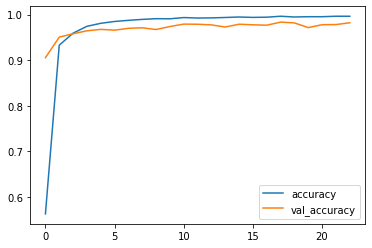

In [19]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

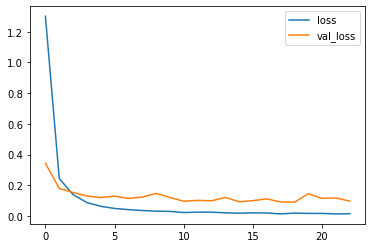

In [20]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

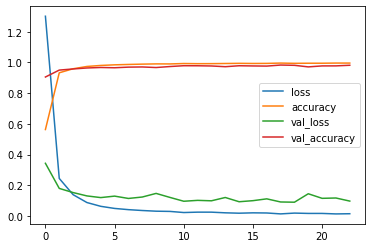

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [22]:
print(model.metrics_names)
print(model.evaluate(X_val,y_val,verbose=0))

['loss', 'accuracy']
[0.09644673019647598, 0.9819999933242798]


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
predictions = np.argmax(model.predict(X_val),axis=1)
predictions

313/313 [==============================] - 3s 8ms/step


array([ 6,  1, 15, ...,  1,  2,  3], dtype=int64)

In [25]:
print(classification_report(val_y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      1.00       202
           2       0.98      0.99      0.99       343
           3       1.00      0.98      0.99       439
           4       0.98      0.99      0.99       537
           5       0.98      0.98      0.98       597
           6       0.98      0.98      0.98       692
           7       0.99      0.99      0.99       817
           8       0.98      0.99      0.98       917
           9       0.98      0.98      0.98       987
          10       0.98      0.98      0.98       938
          11       0.99      0.96      0.98       762
          12       0.99      0.98      0.98       706
          13       0.99      0.99      0.99       578
          14       0.94      0.99      0.97       459
          15       0.98      0.97      0.97       367
          16       1.00      0.97      0.98       292
          17       0.99    

In [26]:
confusion_matrix = confusion_matrix(val_y,predictions)
confusion_matrix

array([[101,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   1, 341,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   1,   3, 432,   0,   0,   0,   1,   1,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   2,   1, 533,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 583,   3,   1,   3,   2,   2,   1,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   4, 677,   1,   2,   1,   3,   0,   0,
          0,   1,   1,   0,   0,   0],
       [  0,   0,   3,   0,   0,   1,   3, 806,   2,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   2,   1, 905,   2,   1,   0,   0,
          1,   4,   0,   0,   0

In [27]:
#misclassification_error(confusion_matrix):
sum_preds = np.sum(confusion_matrix)
sum_correct = np.sum(np.diag(confusion_matrix))
misclassification_error = 1.0 - (float(sum_correct) / float(sum_preds))
    
print("sum_preds               :", int(sum_preds)) 
print("sum_correct_predictions :", int(sum_correct)) 
print("sum_wrong_predictions   :", int(sum_preds - sum_correct))
print("misclassification_error :", misclassification_error)

sum_preds               : 10000
sum_correct_predictions : 9820
sum_wrong_predictions   : 180
misclassification_error : 0.018000000000000016


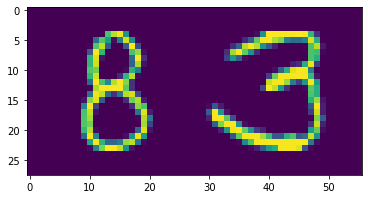

In [28]:
my_number = X_val[999]
plt.imshow(my_number)

In [29]:
# SHAPE --> (num_images,width,height,color_channels)
#model.predict_classes(my_number.reshape(1,28,56,1))

predict_x=model.predict(my_number.reshape(1,28,56,1)) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

1/1 [==============================] - 0s 22ms/step
[11]


In [30]:
print('\n')
print("Test Predictions")
test_predictions =  np.argmax(model.predict(X_test),axis=1)
print(test_predictions)
print(len(test_predictions))
print(type(test_predictions))
df = pd.DataFrame(test_predictions)
df.index.name= 'Index'
df.columns = ['Class']
file_name = f'test_predictions_cnn_model4.csv'
df.to_csv(file_name, index=True)
df



Test Predictions
313/313 [==============================] - 3s 9ms/step
[14  7 10 ... 10  4  6]
10000
<class 'numpy.ndarray'>


,Class
Index,
0,14
1,7
2,10
3,7
4,5
...,...
9995,7
9996,12
9997,10
